# Inspect system J(t)

In [1]:
from nrutils import scsearch,gwylm
from matplotlib.pyplot import *
from positive import *
from numpy import *

(positive)>> Applying custom matplotlib settings.


In [30]:
a = scsearch(keyword='hrq-series',q=1.2,verbose=True)

(scsearch)>> Found keyword (=hrq-series) keyword.
(scsearch)>> Found q (=1.2) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HRq-series: ns-q1.20	(D9_q1.2_a0.0_m160)



In [33]:
y = gwylm(a[0],lmax=4,verbose=True,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lmax (=4) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x12d5a3bd8>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (75.0,None), which differs from the config values of (75,0). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, -2), (2, -1), (2, 0), (2, 1), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3), (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
(load)>> Using the default extraction_parameter of 75
(load)>> Using the default level of 75
(load)>> Loading: mp_WeylScal4::Psi4i_l2_m2_r75.00.asc
(load)>> Imposing a default padding of 3 to the data.
(p

In [34]:
print y.preinspiral.left_dphi
print y.preinspiral.right_dphi
print y.preinspiral.center_dphi

0.07033424309230707
0.08773706975141238
0.07704895511434429


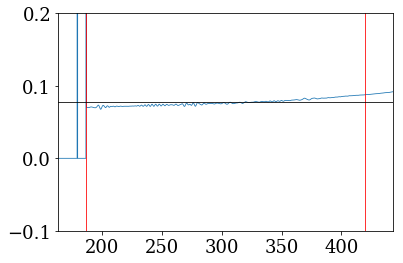

In [35]:
plot( y.t, y[2,2]['psi4'].dphi )
# xlim( y.t[y.preinspiral.window_state] )
# ylim( y[2,2]['psi4'].dphi[y.preinspiral.window_state] )
t1,t2 = y.t[y.preinspiral.window_state]
axvline(t1,color='r')
axvline(t2,color='r')
xlim( lim([t1,t2],dilate=0.1) )
ylim([-0.1,0.2])
#
# axhline( y.preinspiral.left_dphi, color='k' )
axhline( y.preinspiral.center_dphi, color='k' )
# axhline( y.preinspiral.right_dphi, color='k' )
# axhline( mean(y[2,2]['psi4'].dphi[y.preinspiral.left_index:y.preinspiral.right_index]), color='k', ls='--' )
# mean(y[2,2]['psi4'].dphi[y.preinspiral.left_index:y.preinspiral.right_index])

In [36]:
y.__calc_radiated_quantities__(enforce_initial_J_consistency=False)

['time_used', 'mask', 'J', 'M', 'S', 'P', 'Mw', 'X']


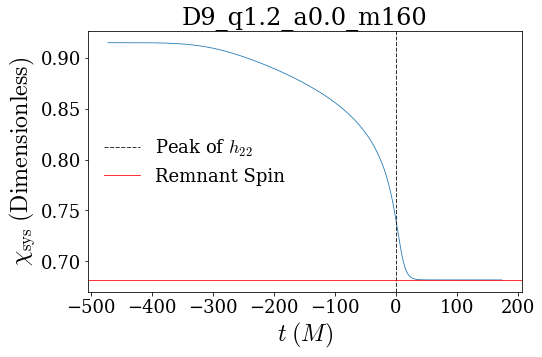

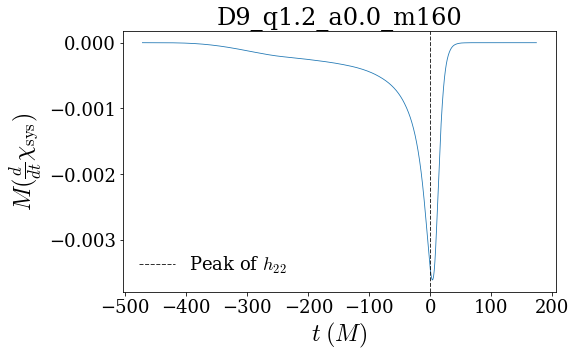

In [45]:
remnant = y.remnant
print remnant.keys()
t_peak = y.t[y[2,2]['strain'].k_amp_max]
Jr = linalg.norm(remnant['J'],axis=1)
Mr = remnant['M']
Xr = linalg.norm(remnant['X'],axis=1)
t = remnant['time_used']

figure( figsize=1.2*figaspect(0.618) )
plot(t-t_peak,Xr)
axvline( 0,ls='--',color='k',label='Peak of $h_{22}$' )
axhline( y.xf, color='r',label='Remnant Spin' )
# xlim( 50*array([-2,2]) )
# ylim( [y.xf*0.99,0.9] );
title(y.simname)
xlabel('$t \; (M)$')
ylabel('$\chi_{\mathrm{sys}} \; (\mathrm{Dimensionless})$')
legend()

figure( figsize=1.2*figaspect(0.618) )
plot(t-t_peak,Mr*spline_diff(t,Xr))
axvline( 0,ls='--',color='k',label='Peak of $h_{22}$' )
# axhline( y.xf, color='r',label='Remnant Spin' )
# xlim( 50*array([-2,2]) )
# ylim( [y.xf*0.99,0.9] );
title(y.simname)
xlabel('$t \; (M)$')
ylabel(r'$M ( \frac{d}{dt}\chi_{\mathrm{sys}} ) $')
legend()

([<matplotlib.axes._subplots.AxesSubplot at 0x118101c90>,
 <matplotlib.figure.Figure at 0x11d289c10>)

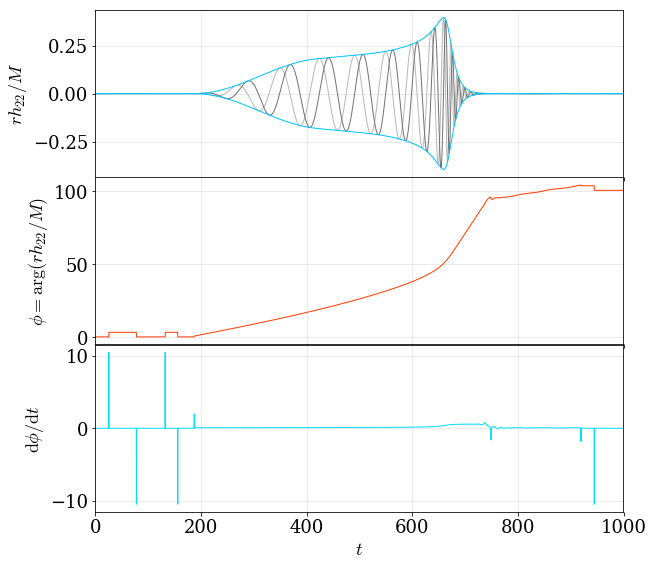

In [44]:
y[2,2]['strain'].plot(domain='time')

In [54]:
A = scsearch(keyword='q8a04t30dPm3_T_120_480',verbose=True)
for a in A:
    print a.simdir()

(scsearch)>> Found keyword (=q8a04t30dPm3_T_120_480) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] q8precessing: 1chi0.40-p-q8.00	(q8a04t30dPm3_T_120_480)

/Users/book/MOUNT/tmp/mnt/hogshead/NR_data/ReducedData-hogshead/q8precessing/120_point/q8a04t30dPm3_T_120_480/


In [50]:
# may the good in the old culture never die 
# may its evils break in the sun
# and become lame 

